In [19]:
from matplotlib import pyplot as plt

from coastal_monitoring.utils import sentinel_1_to_google_drive, get_image_collection

# Getting numpy images from Google Earth Engine

We want to get a InSar misuration in a numpy matrix of a specific bounding box, for example a rectangle with the two points being `[4.1227080154419005, 52.029502065677526]` and `[4.254887275695807, 52.07542126691518]`. To get the relevant `.tiff` files in a specific folder in Google Drive, we just need to call our function with an extra argument, namely a point inside our bounding box like `[4.188454322814947, 52.05157028465844]`

In [2]:
point = [4.188454322814947, 52.05157028465844]
bbox = [[4.1227080154419005, 52.029502065677526], [4.254887275695807, 52.07542126691518]]
tasks = sentinel_1_to_google_drive(
    point=point,
    bounding_box=bbox,
    start_date="2020-05-15",
    end_date="2020-05-25",
    drive_folder="EarthEngine"
)

Hopefully, in tasks you will see a list of the relative status of tasks, one per image you are downloading to Drive. Keep re-running it most recent information. When all `False`, all of your data is ready.

In [10]:
[task.active() for task in tasks]

[False, False, False, False, False, False, False]

In [11]:
ready = any([task.active() for task in tasks])
not ready

True

Now download your folder from your drive and put it where you want. In this notebook the location will be `data/`. Then we can import all the images in a single numpy array:

In [18]:
base_path = "data/EarthEngine/"
paths = [os.path.join(base_path, path) for path in os.listdir(base_path)]
images = get_image_collection(paths, collate=False)
[image.shape for image in images]

[(526, 915, 2),
 (526, 915, 2),
 (526, 916, 2),
 (526, 916, 2),
 (527, 915, 2),
 (527, 916, 2),
 (526, 916, 2)]

We can display an image easily

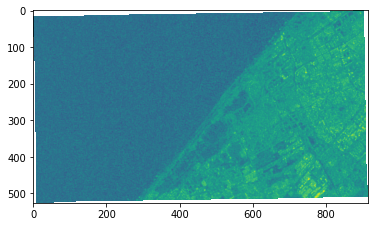

In [20]:
plt.imshow(images[0][:, :, 1])